In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
random_state = 123

# Functional Features

In [2]:
# read the combined data set with all requirements. 
datapath = './promisecombined.csv'
df = pd.read_csv(datapath, index_col = "index")
print(df.shape)

(625, 80)


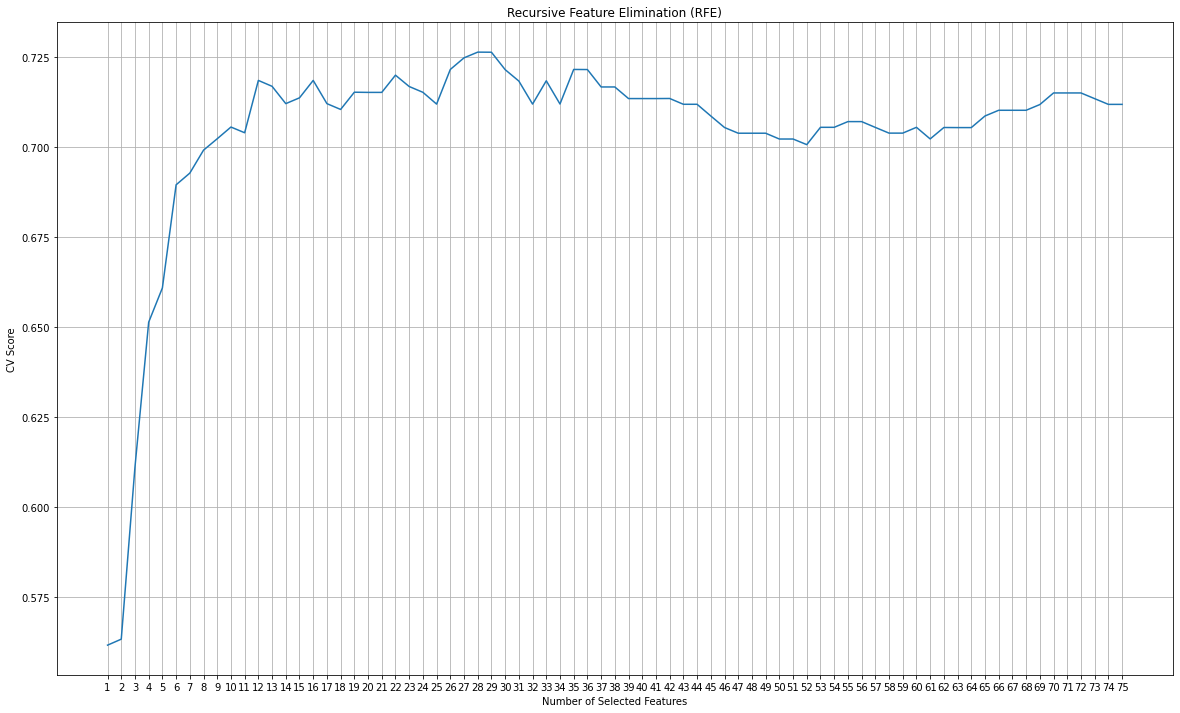

The optimal number of features: 28


In [9]:
#Separate features and label column into two variables, X and y.
X = df.drop(columns='IsFunctional')
X = X.drop(columns='RequirementText')
#X = X.drop(columns='Index')
X = X.drop(columns='IsQuality')
X = X.drop(columns='ProjectID')
X = X.drop(columns='Class')

y = df['IsFunctional']

#Use StandarScaler to standardize all numerical features, so their mean and standard deviation are zero and one, respectively.
scaler = StandardScaler()
X[X.select_dtypes("number").columns] = scaler.fit_transform(X.select_dtypes("number"))

#Encode each categorical feature by using ordinal encoder.
ordEnc = OrdinalEncoder(dtype=np.int)
X[X.select_dtypes("object").columns] = ordEnc.fit_transform(X.select_dtypes("object"))

#encode the label.
labEnc = LabelEncoder()
y = labEnc.fit_transform(y)
#Do feature selection by using recursive feature elimination (RFE). 
#Use Logistic Regression classifier as the estimator, and set the fold (k) for cross-validation to 10.

estimator = LogisticRegression(random_state=random_state)
rfecv = RFECV(estimator=estimator, cv=StratifiedKFold(10, random_state=random_state, shuffle=True))
#, scoring="accuracy")
rfecv.fit(X,y)

#Make a line plot of number of selected features against cross-validation score. Then, print the optimal number of features.
plt.figure(figsize=(20, 12))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, X.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

In [10]:
rfe_feats = X.columns[rfecv.support_]
print(*rfe_feats, sep = "\n")


Length
AComp
auxpass
advmod
nsubjpass
nummod+pobj
nsubj+dobj
ROOT+nummod+punct
nsubj+det+dobj
aux+det+dobj
ROOT_dobj_acl_dobj_det
ROOT_prep_pobj_compound
ROOT_ccomp_aux
ROOT_nsubj_nummod
ROOT_dobj_det+ROOT_nsubj_det
ROOT_aux+ROOT_dobj_acl_aux
ROOT_dobj_acl_aux+ROOT_nsubj_det
ROOT_dobj_det+ROOT_nsubj_det+ROOT_punct
ROOT_aux+ROOT_dobj_det+ROOT_punct
ROOT_aux+ROOT_aux+ROOT_punct
ROOT_aux+ROOT_aux+ROOT_nsubj_det
ROOT_nsubj_det+ROOT_punct+ROOT_punct
ROOT_aux+ROOT_dobj_acl_aux+ROOT_dobj_det
Modal
Cardinal
CompSupAdv
Words
SubTrees


In [ ]:
# update all the datasets columns according to the selected features, and remove the redundant features. 
# and save the new files in the new folder
data_folder = './' #can be an url
datafolder2 = './RFE/'
filenames = ['promise-reclass', 'ds2', 'ds3', 'dronology', 'wasp', 'esa-eucl-est', 'leeds', 'reqview', 'reqreq','rds4','rds8','rds9','rds12', 'OAppt' ]
for filename in filenames: #loop for all datasets
      data3 = pd.read_csv(data_folder+filename + '-ling-allext.csv', engine='python')
      rfe_feats2 = rfe_feats
      rfe_feats2.dtype
      keep_col = ['ProjectID','RequirementText','IsQuality','IsFunctional']
      for col in rfe_feats2:
        keep_col.append(col)
      new_file = data3[keep_col]
      new_filename = filename  + '-rfe-allext.csv'
      new_file.to_csv(datafolder2+new_filename, index=True)

In [12]:
#!zip ALL_DATASETS_RECURSW.zip -r recursw/*
!zip ALL_DATASETS_RFE0.zip -r RFE/*

  adding: RFE/dronology-rfe-allext.csv (deflated 74%)
  adding: RFE/ds2-rfe-allext.csv (deflated 78%)
  adding: RFE/ds3-rfe-allext.csv (deflated 80%)
  adding: RFE/esa-eucl-est-rfe-allext.csv (deflated 72%)
  adding: RFE/leeds-rfe-allext.csv (deflated 71%)
  adding: RFE/OAppt-rfe-allext.csv (deflated 76%)
  adding: RFE/promise-reclass-rfe-allext.csv (deflated 76%)
  adding: RFE/rds12-rfe-allext.csv (deflated 83%)
  adding: RFE/rds4-rfe-allext.csv (deflated 68%)
  adding: RFE/rds8-rfe-allext.csv (deflated 73%)
  adding: RFE/rds9-rfe-allext.csv (deflated 76%)
  adding: RFE/reqreq-rfe-allext.csv (deflated 74%)
  adding: RFE/reqview-rfe-allext.csv (deflated 74%)
  adding: RFE/wasp-rfe-allext.csv (deflated 74%)


# Quality Features

In [13]:
# read the combined data set with all requirements. 
datapath = './promisecombined.csv'
df = pd.read_csv(datapath, index_col = "index")
print(df.shape)

(625, 80)


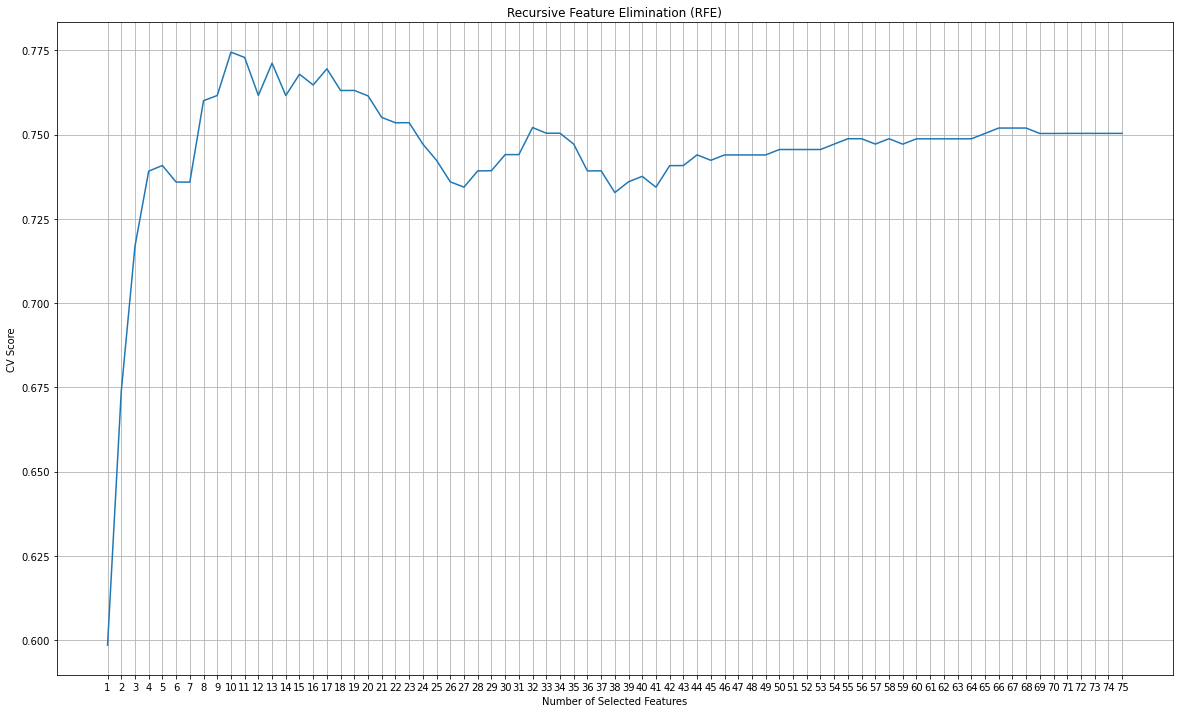

The optimal number of features: 10


In [14]:
#Separate features and label column into two variables, X and y.
X = df.drop(columns='IsQuality')
X = X.drop(columns='RequirementText')
#X = X.drop(columns='Index')
X = X.drop(columns='IsFunctional')
X = X.drop(columns='ProjectID')
X = X.drop(columns='Class')

y = df['IsQuality']

#Use StandarScaler to standardize all numerical features, so their mean and standard deviation are zero and one, respectively.
scaler = StandardScaler()
X[X.select_dtypes("number").columns] = scaler.fit_transform(X.select_dtypes("number"))

#Encode each categorical feature by using ordinal encoder.
ordEnc = OrdinalEncoder(dtype=np.int)
X[X.select_dtypes("object").columns] = ordEnc.fit_transform(X.select_dtypes("object"))

#encode the label.
labEnc = LabelEncoder()
y = labEnc.fit_transform(y)
#Do feature selection by using recursive feature elimination (RFE). 
#Use Logistic Regression classifier as the estimator, and set the fold (k) for cross-validation to 10.

estimator = LogisticRegression(random_state=random_state)
rfecv = RFECV(estimator=estimator, cv=StratifiedKFold(10, random_state=random_state, shuffle=True))
#, scoring="accuracy")
rfecv.fit(X,y)

#Make a line plot of number of selected features against cross-validation score. Then, print the optimal number of features.
plt.figure(figsize=(20, 12))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, X.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

In [15]:
rfe_feats = X.columns[rfecv.support_]
print(*rfe_feats, sep = "\n")

Length
advmod
nsubj+dobj
nsubj+nummod
ROOT+det+dobj
ROOT_ccomp_aux
Modal
Cardinal
Words
SubTrees


In [16]:
# update all the datasets columns according to the selected features, and remove the redundant features. 
# and save the new files in the new folder
data_folder = './' #can be an url
datafolder2 = './RFEQ/'
filenames = ['promise-reclass', 'ds2', 'ds3', 'dronology', 'wasp', 'esa-eucl-est', 'leeds', 'reqview', 'reqreq','rds4','rds8','rds9','rds12', 'OAppt' ]
for filename in filenames: #loop for all datasets
      data3 = pd.read_csv(data_folder+filename + '-ling-allext.csv', engine='python')
      rfe_feats2 = rfe_feats
      rfe_feats2.dtype
      keep_col = ['ProjectID','RequirementText','IsQuality','IsFunctional']
      for col in rfe_feats2:
        keep_col.append(col)
      new_file = data3[keep_col]
      new_filename = filename  + '-rfeq-allext.csv'
      new_file.to_csv(datafolder2+new_filename, index=True)

In [17]:
!zip ALL_DATASETS_RFEQ.zip -r RFEQ/*

  adding: RFEQ/dronology-rfeq-allext.csv (deflated 69%)
  adding: RFEQ/ds2-rfeq-allext.csv (deflated 74%)
  adding: RFEQ/ds3-rfeq-allext.csv (deflated 76%)
  adding: RFEQ/esa-eucl-est-rfeq-allext.csv (deflated 69%)
  adding: RFEQ/leeds-rfeq-allext.csv (deflated 66%)
  adding: RFEQ/OAppt-rfeq-allext.csv (deflated 72%)
  adding: RFEQ/promise-reclass-rfeq-allext.csv (deflated 73%)
  adding: RFEQ/rds12-rfeq-allext.csv (deflated 80%)
  adding: RFEQ/rds4-rfeq-allext.csv (deflated 63%)
  adding: RFEQ/rds8-rfeq-allext.csv (deflated 70%)
  adding: RFEQ/rds9-rfeq-allext.csv (deflated 74%)
  adding: RFEQ/reqreq-rfeq-allext.csv (deflated 69%)
  adding: RFEQ/reqview-rfeq-allext.csv (deflated 69%)
  adding: RFEQ/wasp-rfeq-allext.csv (deflated 70%)
